In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

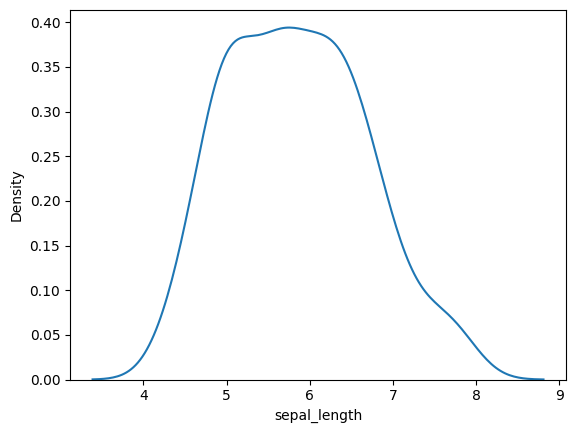

In [3]:
# 
sns.kdeplot(df['sepal_length'])

In [5]:
temp = sorted(df['sepal_length'].tolist())
print(temp)

[4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5, 6.5, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 7.0, 7.1, 7.2, 7.2, 7.2, 7.3, 7.4, 7.6, 7.7, 7.7, 7.7, 7.7, 7.9]


In [6]:
y_quant = []

for i in range(1, 101):
    y_quant.append(np.percentile(temp, i))

samples = np.random.normal(loc=0, scale=1, size=1000)

In [8]:
x_quant = []

for i in range(1, 101):
    x_quant.append(np.percentile(samples, i))

<Axes: >

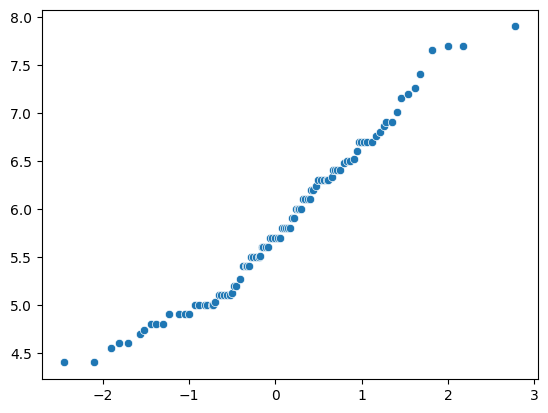

In [9]:
sns.scatterplot(x=x_quant, y=y_quant)

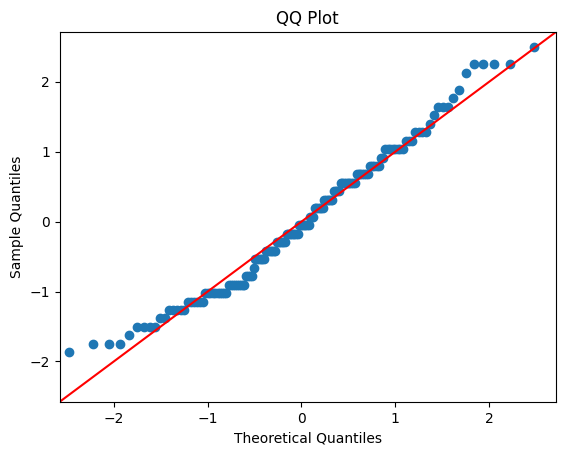

In [ ]:
# Using statsmodel
import statsmodels.api as sm 
import matplotlib.pyplot as plt

# Create a qq plot of the two sets of data. 
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

# Add a title and labels to the plot. 
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.show()

In [12]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a set of random data
x = np.random.uniform(low=0, high=1, size=1000)

(array([ 85., 108.,  95., 105., 118.,  81.,  86., 118., 112.,  92.]),
 array([5.15953404e-04, 1.00376101e-01, 2.00236248e-01, 3.00096395e-01,
        3.99956543e-01, 4.99816690e-01, 5.99676837e-01, 6.99536985e-01,
        7.99397132e-01, 8.99257279e-01, 9.99117427e-01]),
 <BarContainer object of 10 artists>)

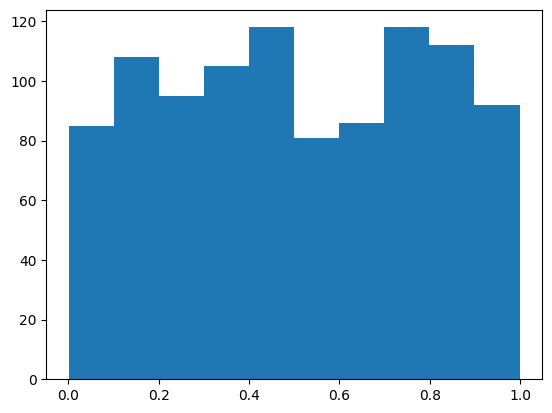

In [13]:
plt.hist(x)

In [14]:
# Fit a uniform distribution to the data
params = stats.uniform.fit(x)
dist = stats.uniform(loc=params[0], scale=params[1])

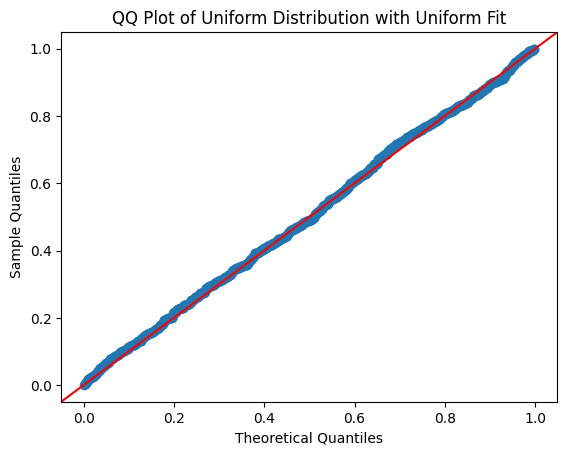

In [15]:
# Create a QQ plot of the data using the uniform distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Uniform Distribution with Uniform Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

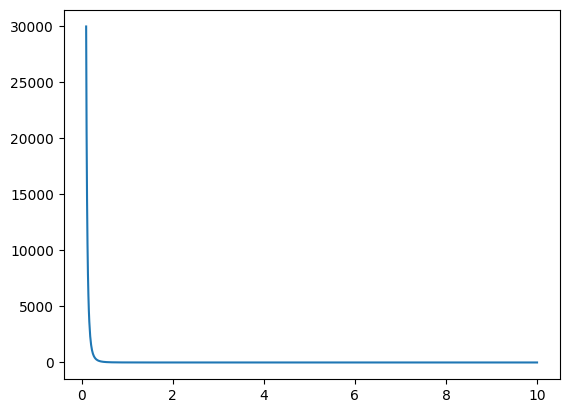

In [16]:
# Log-Log plot. 
# Define the parameters of the Pareto distribution
alpha = 3
xm = 1

# Create an array of x values
x = np.linspace(0.1, 10, 1000)

# Calculate the y values of the Pareto distribution
y = alpha * (xm**alpha) / (x**(alpha+1))

plt.plot(x,y)

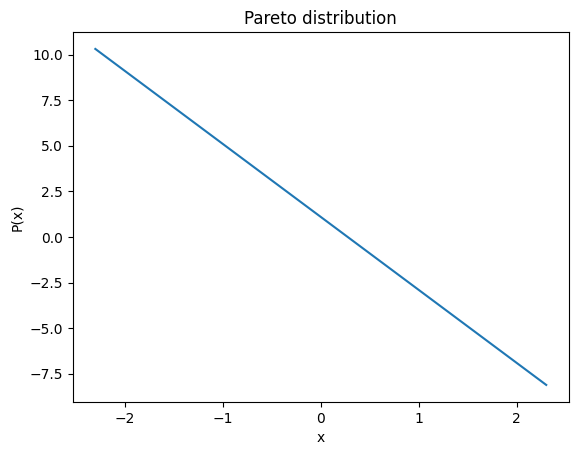

In [17]:
# Create the log-log plot
plt.plot(np.log(x),np.log(y))

# Add labels and a title
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto distribution')

# Show the plot
plt.show()

In [18]:
# Define the parameters of the Pareto distribution
alpha = 2
xm = 1

# Generate a set of random data from the Pareto distribution
x = stats.pareto.rvs(b=alpha, scale=xm, size=1000)

(array([920.,  50.,  16.,   7.,   2.,   1.,   0.,   1.,   1.,   2.]),
 array([ 1.00027494,  3.4847577 ,  5.96924045,  8.45372321, 10.93820597,
        13.42268873, 15.90717148, 18.39165424, 20.876137  , 23.36061975,
        25.84510251]),
 <BarContainer object of 10 artists>)

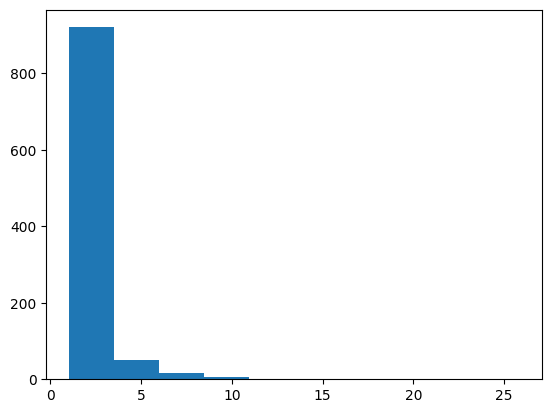

In [19]:
plt.hist(x)

In [20]:
# Fit a Pareto distribution to the data
params = stats.pareto.fit(x, floc=0)

# Create a Pareto distribution object with the fitted parameters
dist = stats.pareto(b=params[0], scale=params[2])

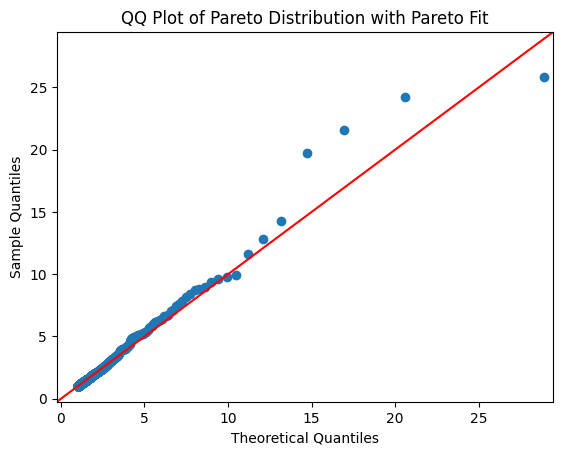

In [21]:
# Create a QQ plot of the data using the Pareto distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Pareto Distribution with Pareto Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

### Function Transformer

In [22]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [26]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [28]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/var/folders/gl/mvj3wxqs13lcpx79n6vbzkl00000gn/T/ipykernel_22099/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [29]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/var/folders/gl/mvj3wxqs13lcpx79n6vbzkl00000gn/T/ipykernel_22099/2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


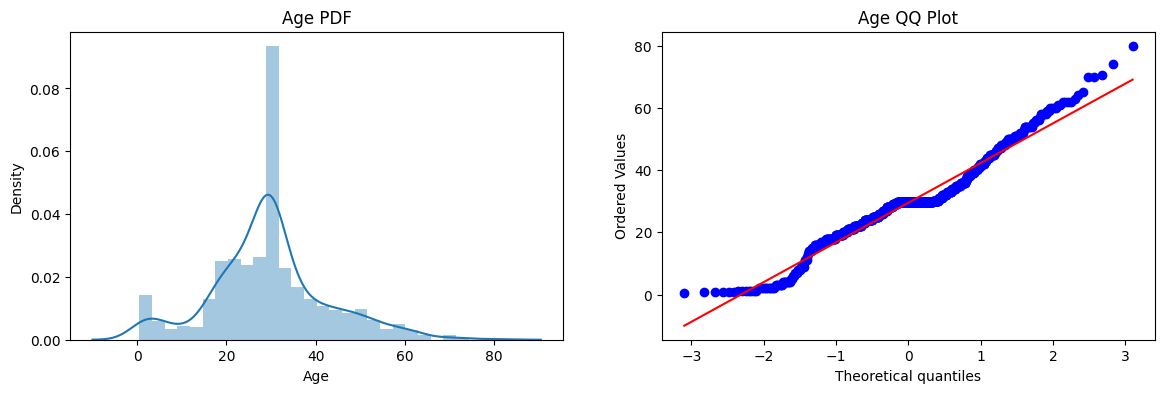

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/var/folders/gl/mvj3wxqs13lcpx79n6vbzkl00000gn/T/ipykernel_22099/2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


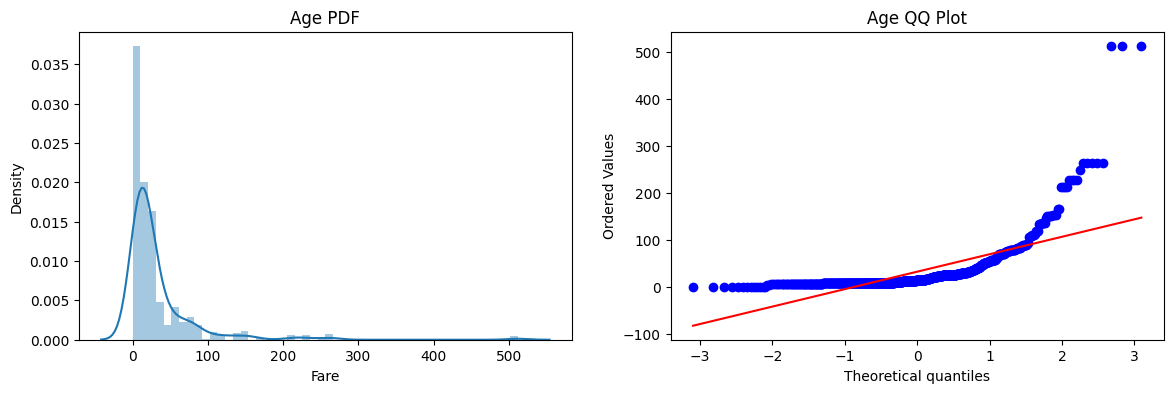

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [33]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [34]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [35]:
trf = FunctionTransformer(func=np.log1p)

In [36]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [37]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


In [38]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6554681647940075


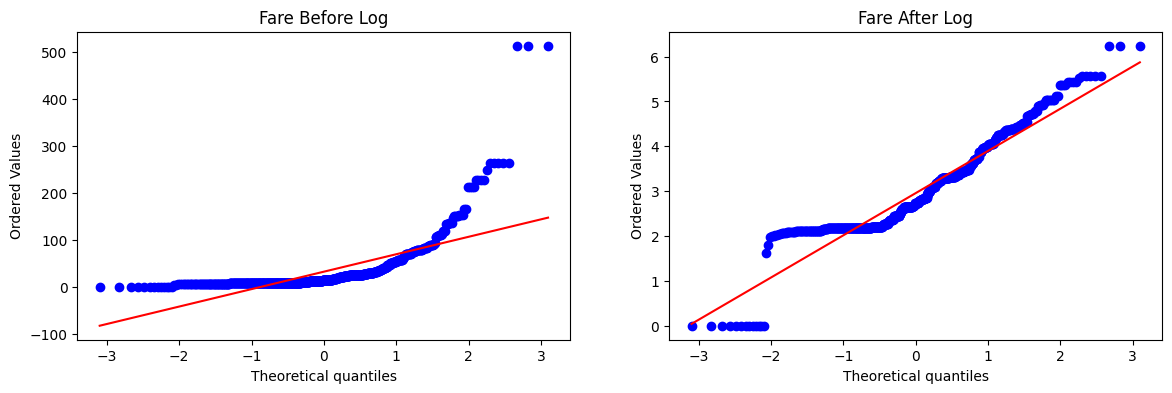

In [39]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

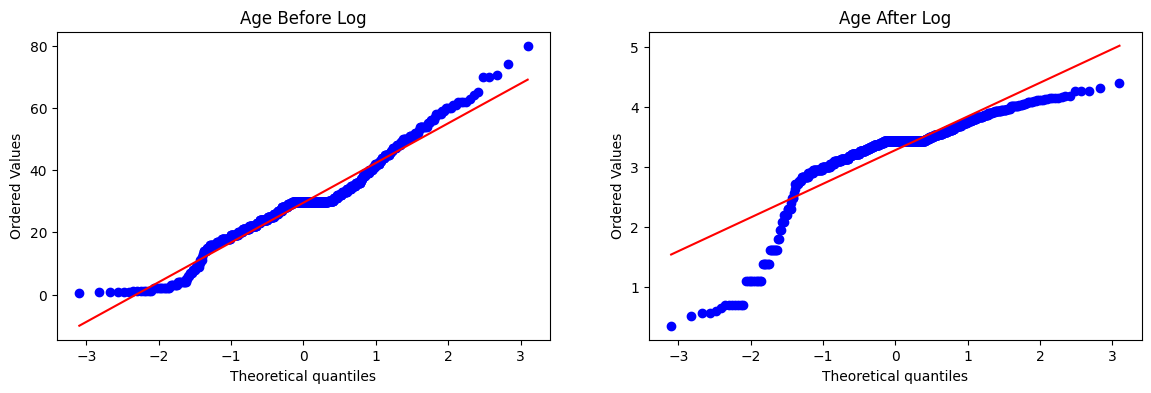

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [41]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6536312849162011


In [43]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577153558052434


In [44]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


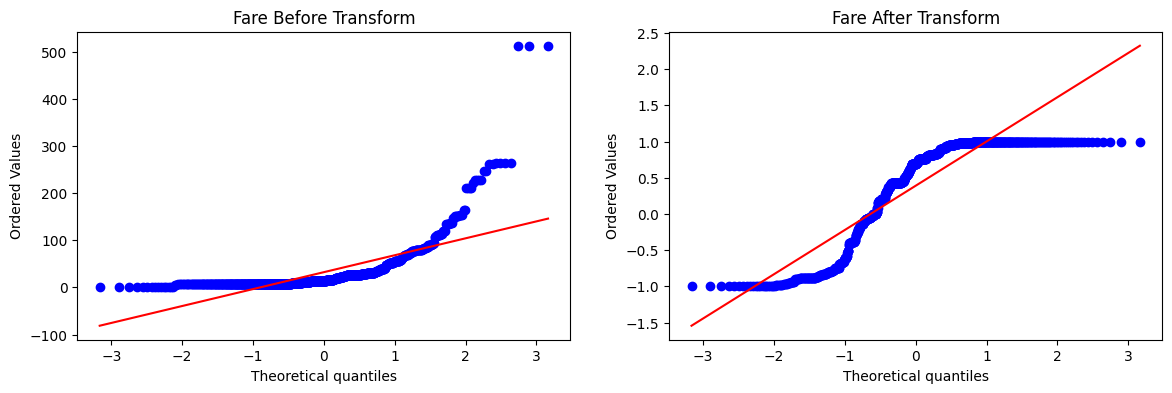

In [45]:
apply_transform(np.sin)